## **Resumo sobre Redes Neurais:**

### **O que são Redes Neurais:**
- Redes neurais são modelos computacionais inspirados no funcionamento do cérebro humano, compostos por unidades chamadas neurônios, que são organizadas em camadas. Essas camadas incluem uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. A conexão entre neurônios é representada por pesos, que são ajustados durante o treinamento.

### **Para que servem as Redes Neurais:**
- Redes neurais são utilizadas em tarefas de aprendizado de máquina para realizar diversas atividades, como classificação, regressão, reconhecimento de padrões, processamento de linguagem natural, visão computacional, entre outras. Elas são capazes de aprender a partir de dados de entrada e melhorar seu desempenho ao longo do tempo.

### **Passo a Passo para Montar uma Rede Neural Simples (como a implementada):**

1. **Inicialização:**
   - Inicialize os pesos da rede de forma aleatória. Isso pode ser feito usando distribuições como a distribuição uniforme ou normal.

2. **Função de Ativação:**
   - Escolha uma função de ativação para os neurônios. A função de ativação introduz não-linearidades na rede, permitindo que ela aprenda padrões mais complexos.

3. **Forward Propagation:**
   - Realize a propagação direta (forward propagation) para calcular as saídas da rede com base nos dados de entrada. Isso envolve multiplicar as entradas pelos pesos, aplicar a função de ativação e passar os resultados para a próxima camada.

4. **Cálculo do Erro:**
   - Calcule o erro comparando as saídas previstas com as saídas reais. Isso é feito usando uma métrica de erro, como o erro quadrático médio.

5. **Backpropagation:**
   - Realize a retropropagação (backpropagation) para calcular os gradientes do erro em relação aos pesos. Isso envolve calcular as derivadas parciais do erro em relação aos pesos e ajustar os pesos de acordo.

6. **Atualização dos Pesos:**
   - Atualize os pesos da rede usando os gradientes calculados e uma taxa de aprendizado. Isso ajusta os pesos para reduzir o erro na próxima iteração.

7. **Iteração:**
   - Repita os passos 3 a 6 por várias épocas ou até que o erro atinja um nível aceitável.

8. **Previsões:**
   - Após o treinamento, utilize a rede neural para fazer previsões em novos dados, aplicando novamente a propagação direta com os pesos treinados.

Este é um resumo básico e o desenvolvimento de redes neurais pode envolver considerações adicionais, como regularização, otimização de hiperparâmetros, normalização de dados e validação cruzada. Além disso, para problemas mais complexos, redes neurais mais sofisticadas, como redes convolucionais e recorrentes, podem ser necessárias.


### **Importando Bibliotecas**

In [1]:
# Importação de Bibliotecas
import numpy as np
import matplotlib.pyplot as plt

### **Construção do modelo**

In [2]:
# Definição da Função de Ativação Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
# Derivada da Função Sigmoid para o Backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
# Inicialização dos Pesos da Rede
def initialize_weights(input_size, hidden_size, output_size):
    # Inicializando pesos aleatoriamente com média zero
    weights_input_hidden = 2 * np.random.random((input_size, hidden_size)) - 1
    weights_hidden_output = 2 * np.random.random((hidden_size, output_size)) - 1

    return weights_input_hidden, weights_hidden_output

In [5]:
# Treinamento da Rede Neural MLP
def train_mlp(X, y, epochs, learning_rate):
    input_size = X.shape[1]
    hidden_size = 8  # Número de neurônios na primeira camada oculta
    output_size = 1

    # Inicializando pesos
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_input = np.dot(X, weights_input_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = sigmoid(output_layer_input)

        # Calculando o erro
        error = y - predicted_output

        # Backpropagation
        output_error = error * sigmoid_derivative(predicted_output)
        hidden_layer_error = output_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

        # Atualizando os pesos
        weights_hidden_output += hidden_layer_output.T.dot(output_error) * learning_rate
        weights_input_hidden += X.T.dot(hidden_layer_error) * learning_rate

    return weights_input_hidden, weights_hidden_output

In [6]:
# Função de Previsão
def predict_mlp(X, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    return predicted_output

In [7]:
# Avaliação da Rede Neural MLP
def evaluate_mlp(X_test, y_test, weights_input_hidden, weights_hidden_output):
    predictions = predict_mlp(X_test, weights_input_hidden, weights_hidden_output)

    # Convertendo as previsões para valores binários (0 ou 1)
    binary_predictions = np.round(predictions)

    # Calculando a acurácia
    accuracy = np.mean(binary_predictions == y_test)

    return accuracy

### **1º Teste**

In [8]:
# Dados de entrada e saída
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [1], [0]])

# Parâmetros de treinamento
epochs = 15000
learning_rate = 0.001

# Treinando a rede neural MLP
trained_weights_input_hidden, trained_weights_hidden_output = train_mlp(X, y, epochs, learning_rate)

# Dados de teste para avaliação
X_test = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])

y_test = np.array([[0], [1], [1], [0]])

# Avaliando a acurácia da rede neural MLP
accuracy_mlp = evaluate_mlp(X_test, y_test, trained_weights_input_hidden, trained_weights_hidden_output)

print("Acurácia da Rede Neural MLP:", accuracy_mlp)

Acurácia da Rede Neural MLP: 0.5


### **Utilizando o modelo criado em um novo contexto**

Este código cria um conjunto de dados fictício com duas características (horas de estudo e horas de sono) e as respectivas etiquetas indicando se um estudante foi aprovado ou reprovado. A relação fictícia é baseada na soma das horas de estudo e de sono, onde, se a soma for maior que 10, o estudante é aprovado (1), caso contrário, é reprovado (0).

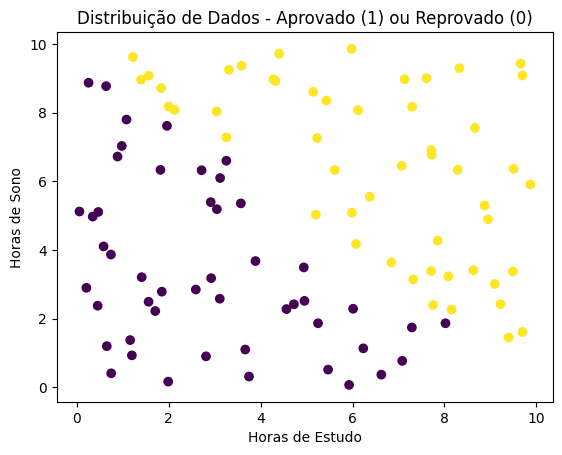

In [9]:
# Geração de Dados Fictícios
np.random.seed(42)  # Para reprodutibilidade

# Número de amostras
num_samples = 100

# Geração de dados de treinamento
hours_of_study = np.random.uniform(0, 10, (num_samples, 1))
hours_of_sleep = np.random.uniform(0, 10, (num_samples, 1))

# Criando uma relação fictícia: se horas de estudo + horas de sono > 10, o estudante é aprovado (1), senão reprovado (0)
pass_threshold = 10
labels = np.array((hours_of_study + hours_of_sleep) > pass_threshold, dtype=int)

# Concatenando as features
X = np.concatenate((hours_of_study, hours_of_sleep), axis=1)

# Visualização dos Dados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Horas de Estudo')
plt.ylabel('Horas de Sono')
plt.title('Distribuição de Dados - Aprovado (1) ou Reprovado (0)')
plt.show()

In [10]:
# Treinamento da Rede Neural MLP
trained_weights_input_hidden, trained_weights_hidden_output = train_mlp(X, labels, epochs=15000, learning_rate=0.00001)

# Avaliação da Rede Neural MLP
# Criando dados de teste
X_test = np.array([[8, 2], [3, 8], [6, 6]])

# Avaliando a acurácia da rede neural MLP nos dados de teste
accuracy_mlp_test = evaluate_mlp(X_test, np.array([[1], [1], [0]]), trained_weights_input_hidden, trained_weights_hidden_output)

print("Acurácia da Rede Neural MLP nos Dados de Teste:", accuracy_mlp_test)

Acurácia da Rede Neural MLP nos Dados de Teste: 0.6666666666666666
